In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
dataset = load_iris()

In [6]:
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df['target'] = dataset.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


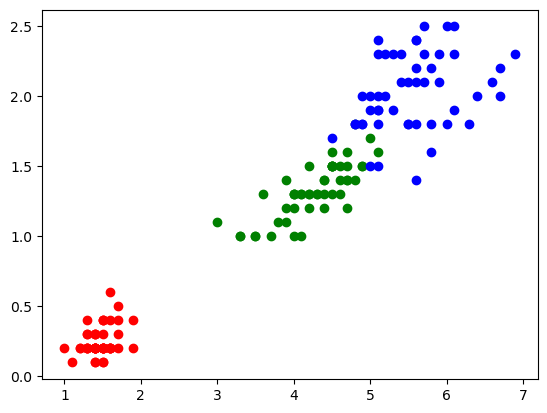

In [12]:
plt.scatter(df[:50]['petal length (cm)'], df[:50]['petal width (cm)'], color = 'red')
plt.scatter(df[50:100]['petal length (cm)'], df[50:100]['petal width (cm)'], color = 'green')
plt.scatter(df[100:150]['petal length (cm)'], df[100:150]['petal width (cm)'], color = 'blue')

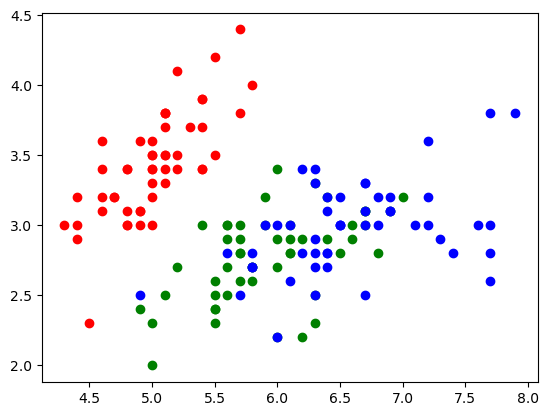

In [17]:
plt.scatter(df[:50]['sepal length (cm)'], df[:50]['sepal width (cm)'], color='red')
plt.scatter(df[50:100]['sepal length (cm)'], df[50:100]['sepal width (cm)'], color='green')
plt.scatter(df[100:150]['sepal length (cm)'], df[100:150]['sepal width (cm)'], color='blue')

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis = 1), df['target'], train_size = 0.7)

In [58]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [59]:
model.score(X_test, y_test)

1.0

<Axes: >

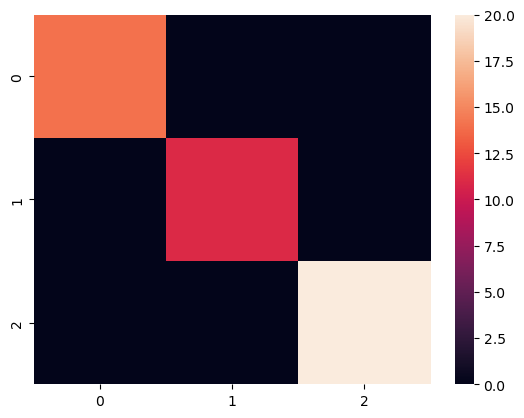

In [63]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm)

In [67]:
dataset = load_digits()
df = pd.DataFrame(dataset.data)
df['target'] = dataset.target

In [71]:
clf = GridSearchCV(KNeighborsClassifier(), {'n_neighbors': [1, 2, 3, 4, 5, 10, 11, 30]}, cv = 5)
clf.fit(dataset.data, dataset.target)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 10, 11, 30]})

In [74]:
df_r = pd.DataFrame(clf.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
df_r.sort_values(sor)

,params,mean_test_score,rank_test_score
0,{'n_neighbors': 1},0.960000,6
1,{'n_neighbors': 2},0.946667,7
2,{'n_neighbors': 3},0.966667,5
3,{'n_neighbors': 4},0.973333,3
4,{'n_neighbors': 5},0.973333,3
5,{'n_neighbors': 10},0.980000,1
6,{'n_neighbors': 11},0.980000,1
7,{'n_neighbors': 30},0.940000,8
